### Aim :

Build the Machine Learning model using scikit learn in Titanic data to predict Survival chances on the Titanic ship based on other dependent variable.

### Importing Libraries : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plot

### Loading Dataset

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

### To display the top 5 rows

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### To Display Bottom 5 rows

In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Column Description 
------------------------
survival: Survival 
PassengerId: Unique Id of a passenger. 
pclass: Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:  of siblings / spouses aboard the Titanic     
parch:  of parents / children aboard the Titanic     
ticket: Ticket number     
fare:   Passenger fare     
cabin:  Cabin number     
embarked: Port of Embarkation

### Data Profiling

In [5]:
## Size of dataset
titanic.shape

(891, 12)

There are 891 no. of rows and 12 no. of columns

In [6]:
## Number of missing values per column 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

"Age" , "Cabin" , "Embarked" columns contain Null Values.

In [7]:
## datatypes of columns
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
### Number of categorical columns
categorical_feature = [column for column in titanic.columns if titanic[column].dtypes == object]

In [9]:
categorical_feature

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
len(categorical_feature)

5

In [11]:
#### Number of Numerical features
numerical_feature = [column for column in titanic.columns if column not in categorical_feature]
numerical_feature

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
len(numerical_feature)

7

In [13]:
### Number of duplicate rows
duplicate_row = titanic[titanic.duplicated()]
print("Number of Duplicates row : ",duplicate_row.shape[0])

Number of Duplicates row :  0


### Statistical Information

The statistics that are generated by the describe() method:

1) count tells us the number of NoN-empty rows in a feature.

2) mean tells us the mean value of that feature.

3) std tells us the Standard Deviation Value of that feature.

4) min tells us the minimum value of that feature.

5) 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.

6) max tells us the maximum value of that feature.

In [14]:
## for numerical features 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
## for categorical features
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Yasbeck, Mr. Antoni",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [16]:
### Correlation
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Explotary Data Analysis (EDA) 

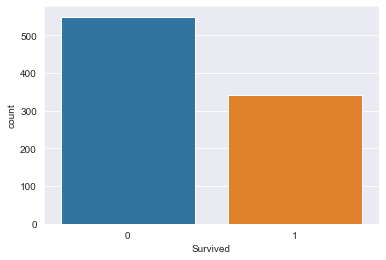

In [17]:
sns.set_style("darkgrid")
sns.countplot(x = "Survived" , data = titanic)

Survived = 0 means the passengers does not survived and Survived = 1 means the passengers still survived .

observation :- Probability of not survived a person on titanic ship is more than probability of survived a person.

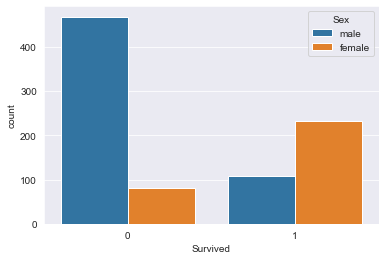

In [18]:
sns.countplot(x = "Survived" , data = titanic , hue = "Sex")

Observation :- 
    
1) Survival Chances of Female is more than a man.

2) Not survival chances of female is less than a man.

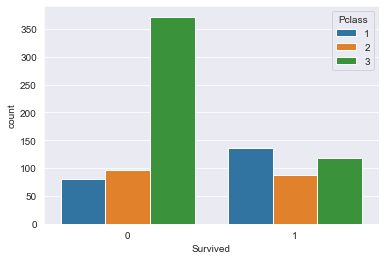

In [19]:
sns.countplot(x = "Survived" , data = titanic , hue = "Pclass")

Observation :- 
    
1) approximately 380 passengers of class 3 are not survived.

2) Survive rate of class 1 is more than other class.

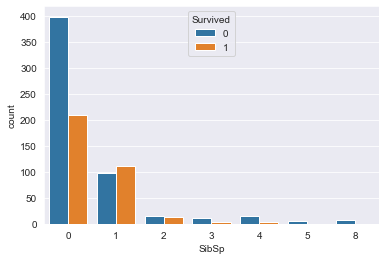

In [20]:
sns.countplot(x = "SibSp" , data = titanic , hue = "Survived")

Observation :- 
    
1) It Give information about siblings and spoach of passengers who are still survived .

2) Chances of Not Surviving 0 SibSp class will be less than Surviving chances.

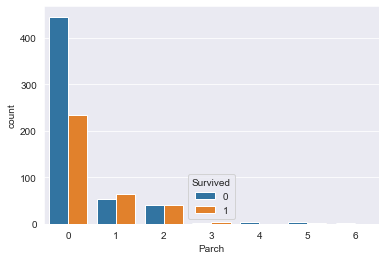

In [21]:
sns.countplot(x = "Parch" , data = titanic , hue = "Survived")

Observation :- It Give information about Parents and children of passengers who are still survived .

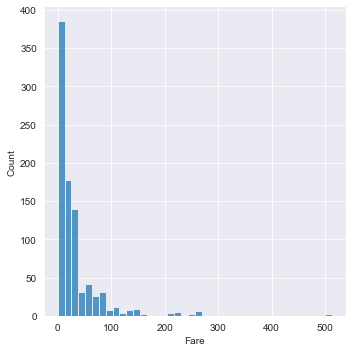

In [22]:
sns.displot(x = titanic["Fare"],kind="hist",bins = 40)

Observation ;- Fare column contain outilers and it follow right skewed disturbation.

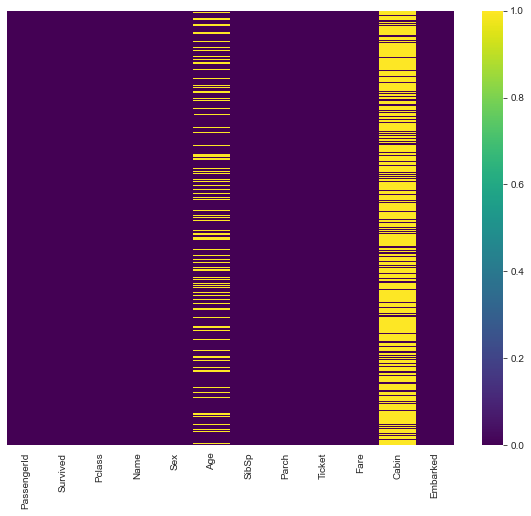

In [23]:
### Heat map for analysis Null Values
plt.figure(figsize = (10,8))
sns.heatmap(data = titanic.isnull() ,cmap = "viridis" , yticklabels = False )

Observation  :- Roughly 20% data of the age column is missing. The proportion of age missing is likely small enough for resonable replacement with some form of imputation. for cabin column , it look like we are missing too much of data to do something useful with at a basic level.

#### Analysis Categorical Features

In [24]:
categorical_feature 

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [25]:
titanic[categorical_feature]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [26]:
# count unique values in categorical data
for column in categorical_feature :
    print("column ",column ,"has {} unique categories.".format(len(titanic[column].unique())))

column  Name has 891 unique categories.
column  Sex has 2 unique categories.
column  Ticket has 681 unique categories.
column  Cabin has 148 unique categories.
column  Embarked has 4 unique categories.


#### Boxplot for Outliers 

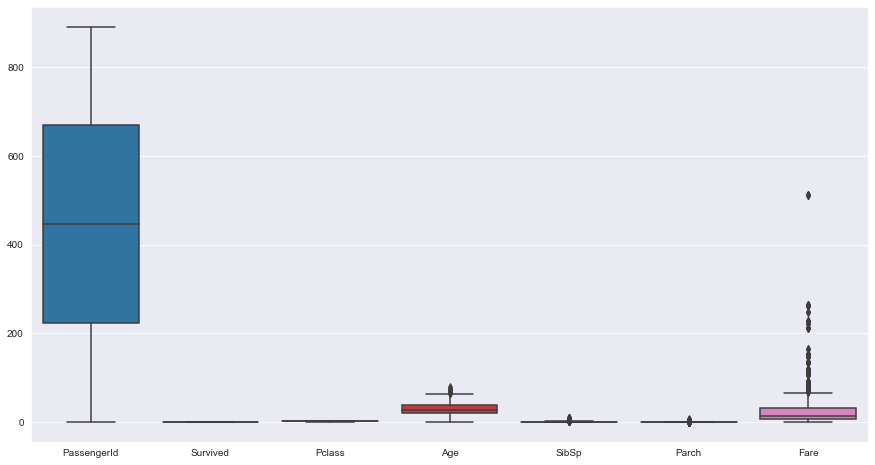

In [27]:
plt.figure(figsize = (15,8))
sns.boxplot(data = titanic[numerical_feature])

In [28]:
for k, v in titanic[numerical_feature].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(titanic)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column PassengerId outliers = 0.00%
Column Survived outliers = 0.00%
Column Pclass outliers = 0.00%
Column Age outliers = 1.23%
Column SibSp outliers = 5.16%
Column Parch outliers = 100.00%
Column Fare outliers = 13.02%


Observation :- Parch Column contain 100% Outilers So, we use those Machine learning Algorithm which can not be affected by Outliers.

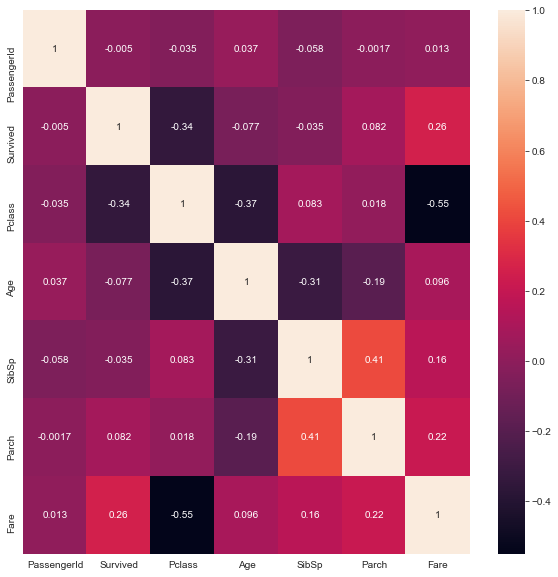

In [29]:
## Correlational graph
plt.figure(figsize=(10,10), facecolor='white')
sns.heatmap(data=titanic.corr(), annot=True)

### Data Transformers( Pre-processing steps)

#### 1) Null value handling

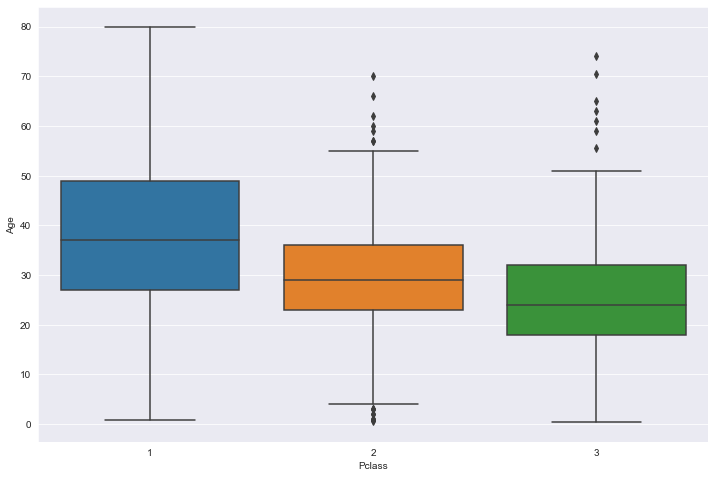

In [30]:
plt.figure(figsize = (12 , 8))
sns.boxplot(x = "Pclass" , y = "Age" , data = titanic)

mean value of class 1 :- 37 approx. 
    
mean value of class 2 :- 29 approx. 
    
mean value of class 3 :- 25 approx.

In [31]:
def null_value_handle(columns) :
    age = columns[0]
    Pclass = columns[1]
    if pd.isna(age) :
        if Pclass == 1:
            return 37
        elif Pclass == 2 :
            return 29
        else :
            return 24   
    else :
        return age

In [32]:
titanic["Age"] = titanic[["Age" , "Pclass"]].apply(null_value_handle, axis = 1)

After Handling nan value of "Age" heatmap :-

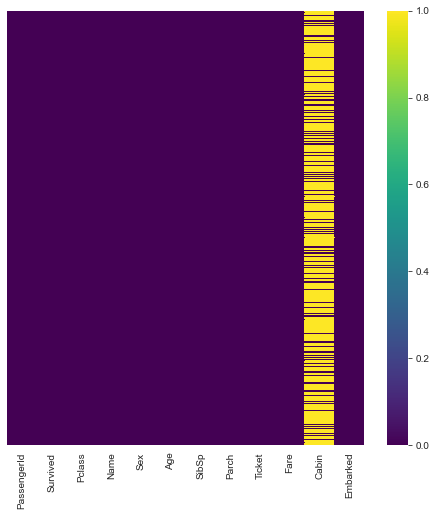

In [33]:
### Heat map for analysis Null Values
plt.figure(figsize = (8,8))
sns.heatmap(data = titanic.isnull() ,cmap = "viridis" , yticklabels = False )

Drop cabin column bcz it contain 90% Nan values 

In [34]:
titanic = titanic.drop(columns = ["Cabin"])

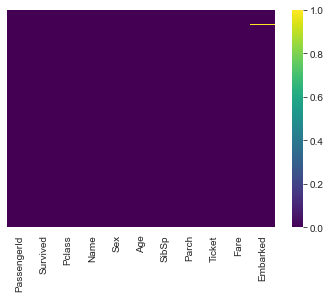

In [35]:
### Heat map for analysis Null Values
sns.heatmap(data = titanic.isnull() ,cmap = "viridis" , yticklabels = False )

In [36]:
# Drop Embarked Nan Value row
titanic.dropna(inplace = True)

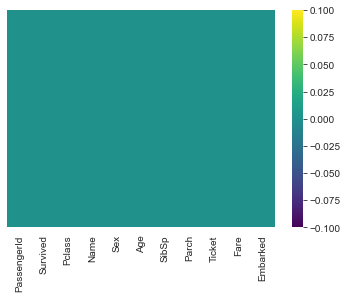

In [37]:
sns.heatmap(data = titanic.isnull() ,cmap = "viridis" , yticklabels = False )

#### 2) Conversion of Categorical features to numerical features

In [38]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [39]:
### one hot encoding
def one_hot_encoding(titanic, column):
    return pd.get_dummies(titanic,columns = [column],prefix = column)

In [40]:
titanic = one_hot_encoding(titanic,"Sex")

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


Deleting all those columns which are not required .

In [42]:
titanic = titanic.drop(columns = ["PassengerId","Name","Ticket","Embarked","Sex_male"])
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


### Pair Plot

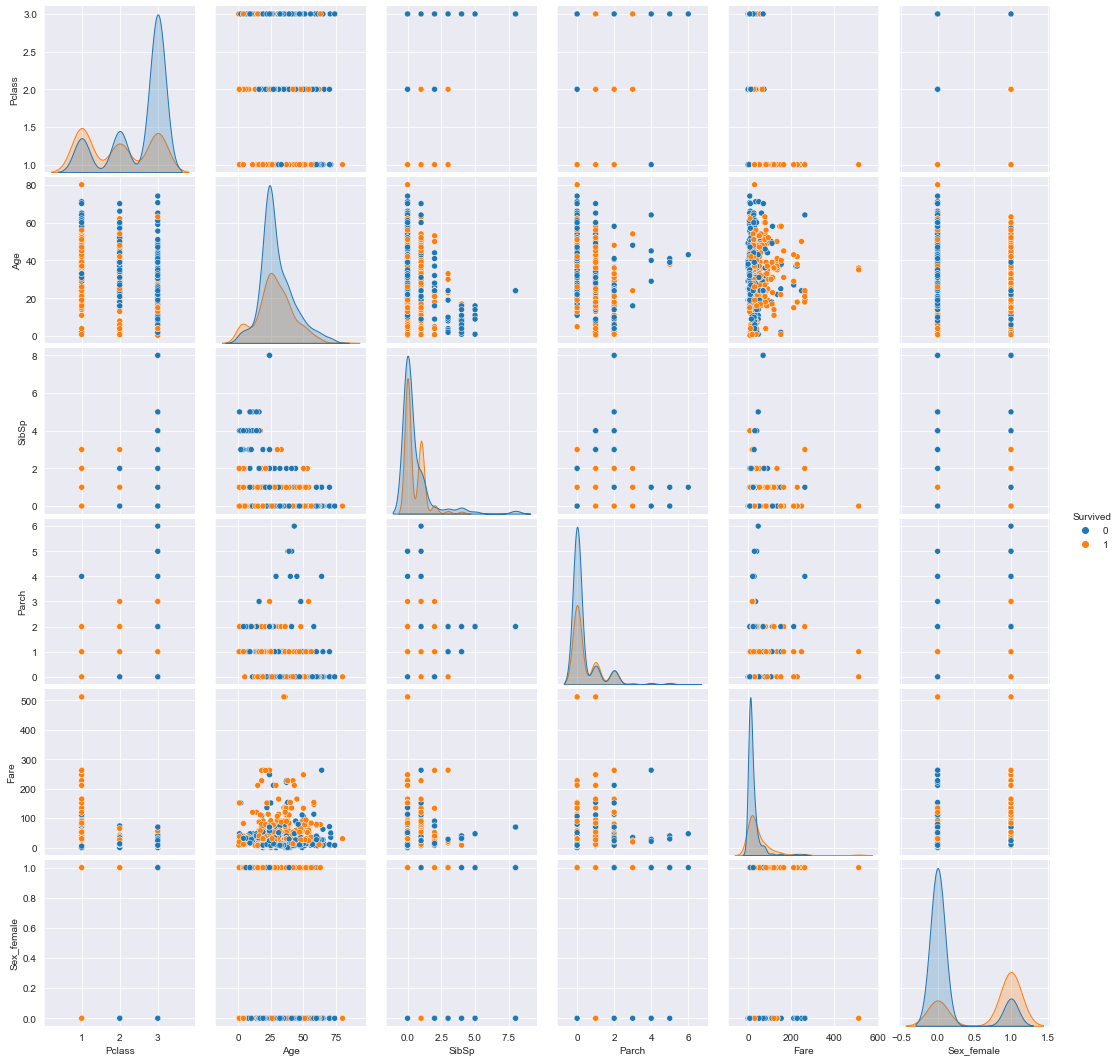

In [43]:
sns.pairplot(data = titanic , hue = 'Survived')
plt.show()

### Splitting of data into independent feature and dependent feature

In [44]:
X = titanic.drop(columns = ["Survived"])
Y = titanic["Survived"]

In [45]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0


In [46]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Splitting data into train and test

In [47]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.30 , random_state = 101)

In [48]:
x_train.shape , x_test.shape

((622, 6), (267, 6))

In [49]:
y_train.shape , y_test.shape

((622,), (267,))

### Implement Machine learning algorithm 

1) Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [51]:
model = DecisionTreeClassifier()

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
# accuracy of our classification tree for train data
model.score(x_train,y_train)

0.9887459807073955

In [54]:
# accuracy of our classification tree for test data
model.score(x_test,y_test)

0.7827715355805244

Our model in Underfitting . 

In [55]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [56]:
# accuracy of our classification tree
model.score(x_test,y_test)

0.7827715355805244

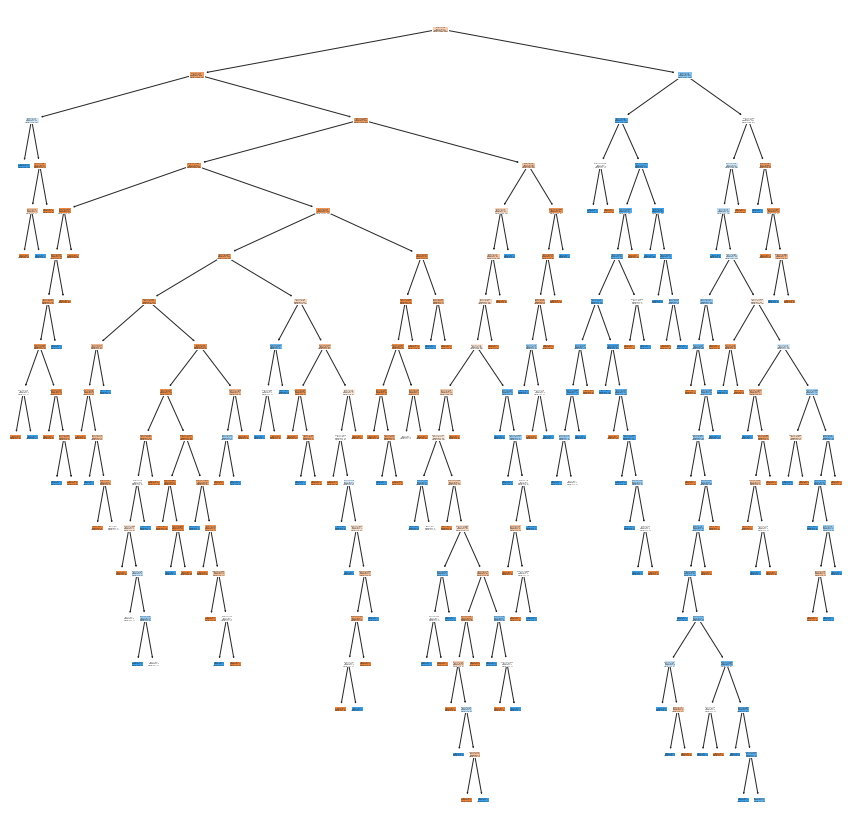

In [57]:
## Draw decision tree
fig = plt.figure(figsize = (15,15))
tree.plot_tree(model,filled = True)
plt.show()

In [58]:
fig.savefig("decistion_tree.png")

Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,15,1),
    'min_samples_split': range(2,15,1),
    'splitter' : ['best', 'random'] 
}

In [61]:
grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=5,n_jobs =-1)

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'random']})

In [66]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'random'}

In [67]:
grid_search.best_score_

0.8279870967741936

In [68]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth =17, min_samples_leaf= 1, min_samples_split= 7, splitter ='random')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=7,
                       splitter='random')

In [69]:
# accuracy of our classification tree for train data
model.score(x_train,y_train)

0.8922829581993569

In [70]:
# accuracy of our classification tree for test data
model.score(x_test,y_test)

0.8426966292134831

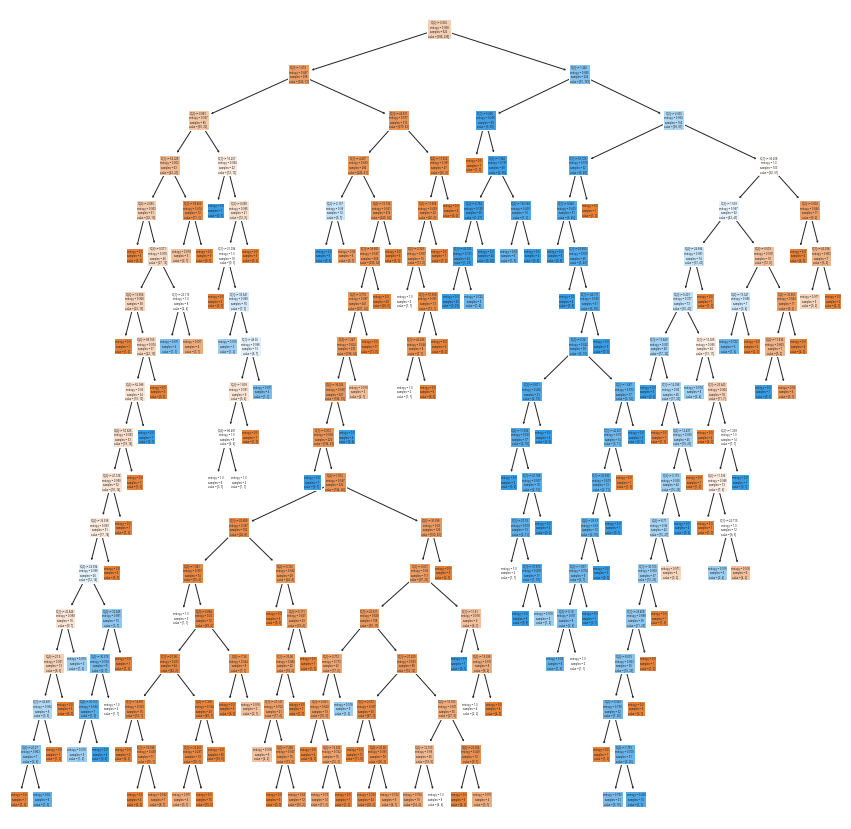

In [71]:
## Draw decision tree
fig = plt.figure(figsize = (15,15))
tree.plot_tree(model,filled = True)
plt.show()

In [72]:
fig.savefig("best_decistion_tree.png")

In [73]:
y_pred = model.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score , classification_report

In [75]:
confusion_matrix(y_test , y_pred)

array([[150,  13],
       [ 29,  75]], dtype=int64)

<Figure size 504x504 with 0 Axes>

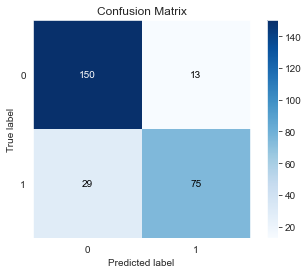

In [76]:
import scikitplot
plt.figure(figsize = (7,7))
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       163
           1       0.85      0.72      0.78       104

    accuracy                           0.84       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



In [78]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.8206996224634262

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

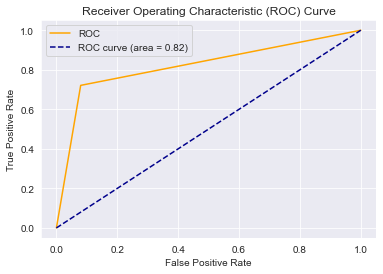

In [80]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [82]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)